# Exploratory Data Analysis

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

# autoload self-written modules
%load_ext autoreload
%autoreload 2
import utils as ut

In [111]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
train.rename(columns = {'Unnamed: 0': 'index'}, inplace=True)
train.set_index('index', inplace=True)
test.rename(columns = {'Unnamed: 0': 'index'}, inplace=True)
test.set_index('index', inplace=True)

In [112]:
train

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,y
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
37,-0.319867,-1.782740,-0.509491,-0.132871,0.012128,-0.217217,-1.446651,-0.949876,-1.821104,-0.983769,1.140022,0.236123,0.403703,-0.418485,-1.887907,-1.393826,0.007714,0.812770,2.374861,0.731727,0.615941,0.780706,-0.979752,-0.461511,-2.045405,0.822873,-0.457964,-1.170476,1.940632,0.446115,1
148,0.162034,-0.366207,-0.318993,0.928446,-0.294053,0.862495,-0.294655,-0.032573,-0.484781,0.288840,0.757060,-0.821145,-1.087330,0.180044,0.507271,0.142448,-0.475149,-0.164010,-0.602825,-0.825562,0.582497,0.385469,1.265449,0.362401,0.329942,0.814781,0.199156,-0.284357,-0.291730,-0.771806,1
187,-1.830391,0.663793,-0.394207,1.445972,-0.159527,-0.938228,0.069353,-0.145624,0.037410,-1.741310,-0.186070,-0.641743,-0.316608,-0.159739,0.741653,0.257694,-0.602107,0.412845,1.864373,-0.797018,0.776863,0.527492,0.972503,0.061666,0.546433,-0.196517,0.038246,-1.447703,2.225193,-0.542183,0
92,0.089999,0.660587,-0.715335,-0.643461,0.654245,-1.850053,0.167255,-0.283930,-0.537093,-0.186325,0.761623,0.869208,-0.789702,-1.521844,-0.401622,0.163687,1.036523,0.049232,-0.086562,0.439141,1.346287,-1.564223,1.196054,-1.701783,-0.809954,-0.389292,-0.563082,-0.856859,0.239026,0.471210,0
384,0.016884,-0.357424,-0.412270,-0.034442,0.263881,-1.327011,0.699558,-0.440414,-0.836673,-0.804550,-0.749881,0.161008,2.447954,-1.155787,-0.099326,-0.276902,1.566922,-1.115126,0.560270,-1.133876,-0.489802,0.292984,-1.765669,-0.679499,0.304252,0.176723,-1.637318,2.163805,-0.020100,-0.707487,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,0.113868,0.153106,2.055160,0.338792,-0.947675,1.359573,-1.310328,2.820601,0.705938,1.450792,0.822377,-0.475914,0.536086,-0.324527,1.667002,1.433558,-0.712443,1.019260,-0.192827,-1.403604,-1.222988,1.467666,-0.264666,0.054175,1.848919,-0.999133,0.876756,-1.614324,0.814562,-0.583839,1
240,-1.946787,1.186707,-0.153884,1.446319,-0.052413,-0.980420,-1.036835,0.511144,-0.134678,-0.400760,-1.929202,-2.138441,-0.818570,-0.789073,1.845298,-0.090662,1.108818,-1.393554,1.573797,-1.408893,-1.510782,2.043512,0.878452,-0.478829,2.085268,-0.558648,-0.725387,0.474681,1.536671,-0.550899,0
478,0.718215,-1.730046,-1.327324,0.896624,-0.587356,-1.190515,0.155357,-0.721414,0.643326,-0.143052,0.816334,0.158531,1.938198,-0.856262,-0.853111,-0.108218,-0.495565,-0.526720,0.505123,1.016671,0.766374,0.235730,-1.273309,-0.219388,-0.573109,0.235180,-0.300490,-0.468695,0.565232,0.416253,1


In [113]:
test

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,y
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
147,1.184116,0.370564,0.298618,-0.882603,0.477373,-0.093480,-0.628349,0.098630,0.723276,1.252391,0.854508,-0.544223,0.848622,-0.506229,-0.721924,-0.318037,-0.214825,-0.557063,-0.596838,-0.116243,1.979703,0.108347,-0.040993,-1.012353,-0.564690,0.190726,0.627046,0.161142,-0.649255,-0.373124,NaN
70,1.087334,-0.121815,0.644399,-0.267642,-0.775491,0.650952,-0.318617,-0.790283,-0.078485,-1.006829,-0.365947,-0.062306,-0.147727,-1.738106,-0.758929,-0.126315,0.466400,1.753067,-0.046957,-0.501999,1.089824,0.567346,0.054397,-1.582916,-0.764745,-0.212431,-0.711236,-0.785869,-0.749413,0.186780,NaN
321,-0.708702,0.648592,1.153780,0.413825,0.507093,0.330309,1.003486,0.545751,0.745613,-1.611019,-0.393367,-0.395907,0.602703,1.303116,-0.698447,1.545931,1.620675,-1.816202,0.347928,-1.347898,0.516384,0.616483,-0.006599,1.226371,-0.750813,-1.024779,-0.853787,2.143898,0.266503,-1.703851,NaN
177,-1.311228,-1.220396,-0.006967,-0.965994,1.021639,-1.192457,-0.373225,-0.073332,0.041676,0.312246,1.416238,-0.398368,-0.023954,0.358759,-2.007510,-1.847023,-1.862407,0.377488,-2.206606,-0.619271,1.584493,0.490632,-1.063536,0.110987,-0.999310,2.453442,1.276009,-0.748049,-1.868460,-0.656681,NaN
469,1.168479,0.301016,0.751344,-0.985497,2.140455,1.630761,0.020595,-1.561981,0.604878,-1.138328,2.422316,0.604784,0.012900,-0.961924,0.068338,0.785159,0.246669,-0.830465,-0.270781,-0.167764,2.805335,-1.149753,-0.863792,-1.132003,0.327646,-0.481523,-0.795213,0.056260,-0.026992,-0.686683,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,0.769382,-1.050302,0.403136,-0.083462,-0.783083,-0.014483,0.630109,-0.801149,0.625147,-0.432072,2.010248,-0.453125,-0.518531,0.049963,1.024425,-0.787608,-1.817632,1.244066,-0.985961,0.634511,2.403935,0.242206,-0.586523,0.554591,0.749162,1.340524,0.690280,-1.302495,-1.064142,1.172754,NaN
96,1.138791,-0.289902,1.231958,-1.475487,-0.386567,0.945946,-0.277798,2.019543,-0.808879,0.560690,-0.451689,0.221243,-0.525146,0.615710,0.440159,-0.276799,-0.175525,-0.212180,-0.041104,-0.869992,-0.007339,0.536548,0.501609,0.527286,0.545708,1.109713,0.443897,-0.228585,0.070028,-0.044741,NaN
129,1.162869,-1.171816,-2.268374,0.870315,-0.680838,0.181451,-0.954761,-0.109750,-0.150319,1.159474,0.607893,0.909017,0.040548,-0.772354,1.961050,0.041065,-0.760075,0.814226,0.407303,0.691969,0.020634,0.247224,0.881669,-0.949470,1.056234,0.076250,1.369521,-0.074463,0.218769,0.776973,NaN


## Imbalanced label

In [114]:
np.mean(train['y'])

0.7266666666666667

## Distribution of numeric features

Numeric summary.

In [115]:
train.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,y
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,-0.026392,-0.048946,-0.003417,-0.014423,-0.005521,0.058423,-0.016958,-0.003033,0.010117,-0.068474,-0.048870,0.040061,-0.041377,0.009337,0.042459,0.051496,0.046543,0.075186,-0.001607,0.048633,-0.066770,-0.055108,0.014416,0.006843,0.040823,-0.032319,-0.046155,-0.071128,0.003332,0.037129,0.726667
std,1.005368,1.014089,0.986628,1.050032,1.014657,1.020265,0.968598,1.051841,1.005148,0.949496,0.950154,1.037937,0.993182,1.002370,0.990267,0.995326,0.935185,1.017959,1.003513,1.017977,0.944952,1.027296,0.996255,0.982186,0.983707,1.010919,0.925883,1.054611,1.005001,1.004117,0.446415
min,-2.609942,-2.712652,-2.637669,-2.781721,-2.950299,-3.050491,-2.603255,-2.642453,-2.860709,-2.583426,-2.818685,-3.118470,-2.469472,-3.474255,-2.875127,-2.433438,-2.958636,-2.769450,-3.087913,-3.139580,-2.688778,-3.193209,-2.936439,-2.897773,-2.134531,-2.366249,-2.429339,-3.416947,-2.750524,-3.158411,0.000000
25%,-0.726710,-0.734569,-0.635948,-0.745394,-0.567787,-0.682221,-0.668832,-0.742697,-0.677430,-0.667036,-0.711370,-0.656992,-0.762560,-0.649098,-0.642237,-0.702369,-0.518892,-0.586363,-0.668024,-0.636498,-0.679008,-0.812756,-0.678886,-0.674995,-0.623447,-0.632492,-0.653305,-0.724195,-0.688356,-0.584123,0.000000
50%,-0.054689,-0.038538,-0.084274,0.014377,0.011785,-0.008145,-0.000529,-0.035699,0.092627,-0.049109,-0.016224,-0.001022,-0.123790,-0.092287,0.007533,0.035120,0.059736,0.083988,0.009826,0.088277,-0.089962,0.035317,0.067712,0.007240,0.084397,-0.022077,-0.065045,-0.124950,-0.010233,0.064891,1.000000
75%,0.661813,0.620749,0.674059,0.743379,0.660478,0.771746,0.572238,0.755472,0.698164,0.544081,0.581002,0.829797,0.593108,0.777051,0.743852,0.779171,0.703968,0.751177,0.599586,0.724476,0.605405,0.612307,0.649005,0.697461,0.738132,0.690049,0.551022,0.662910,0.714041,0.700811,1.000000
max,3.212222,2.957998,3.076733,2.535272,2.446418,2.768959,2.939424,2.820601,2.846463,2.810936,2.738903,2.990645,2.572563,2.638192,2.731515,2.624831,2.391537,3.143238,2.513346,3.327358,3.187978,2.657443,2.451573,3.242972,2.085268,2.927881,2.958891,3.111546,2.225193,2.761718,1.000000


Conduct Shapiro-Wilk test to test normality.

In [116]:
# Shapiro-Wilk test
pvalues = []
for i in range(30):
    pvalues.append(stats.shapiro(train.iloc[:,i])[1])
print(pvalues)
print("\nThe smallest p-value:")
print(min(pvalues)) # smallest pvalue
print("\nThe index of the smallest p-value:")
print(pvalues.index(min(pvalues)))

pvalues = np.array(pvalues)
k = 4
result = np.argpartition(pvalues, k)
print(f"\n{k} smallest p-values:")
print(pvalues[result[:k]])

[0.6434370279312134, 0.3451407253742218, 0.6395679712295532, 0.4073500633239746, 0.1497505009174347, 0.14428888261318207, 0.7036994099617004, 0.3857588768005371, 0.697567343711853, 0.1591568887233734, 0.9971301555633545, 0.6556364297866821, 0.2766757011413574, 0.3337629437446594, 0.4523394703865051, 0.11459726095199585, 0.6376106142997742, 0.9784736037254333, 0.5935220718383789, 0.8373520970344543, 0.9002934098243713, 0.14111581444740295, 0.37454986572265625, 0.9502555727958679, 0.014674855396151543, 0.32209518551826477, 0.6545836925506592, 0.47092902660369873, 0.2886999845504761, 0.6675626039505005]

The smallest p-value:
0.014674855396151543

The index of the smallest p-value:
24

4 smallest p-values:
[0.01467486 0.11459726 0.14111581 0.14428888]


Density plot of V25 which is the feature with the smallest pvalue of Shapiro-Wilk test.

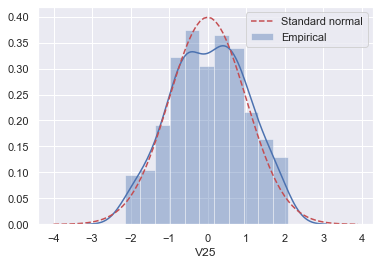

In [117]:
# density plot of V25 which is the feature with the smallest pvalue of Shapiro-Wilk test
sns.distplot(train.iloc[:, 24], label = "Empirical")
h = np.arange(-4, 4, 0.1)
fit = stats.norm.pdf(h, 0, 1) 
plt.plot(h, fit, 'r--', label = "Standard normal")
plt.legend()
plt.show()

## Correlation of numeric features

The image has been saved to 'images/heatmap.pdf'.


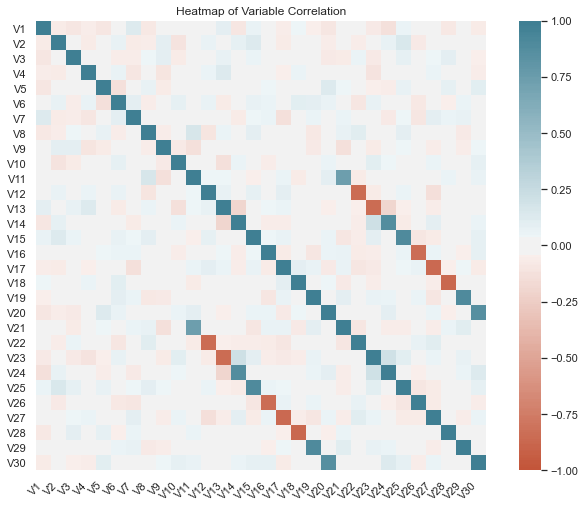

Grouping:
1: ['V11', 'V21']
2: ['V12', 'V22']
3: ['V13', 'V23']
4: ['V14', 'V24']
5: ['V15', 'V25']
6: ['V16', 'V26']
7: ['V17', 'V27']
8: ['V18', 'V28']
9: ['V19', 'V29']
10: ['V20', 'V30']
Others: ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10']


In [118]:
# correlation heatmap
X = train.drop(columns = ['y'])
ut.show_corr(X, cutoff=0.7)

## Preliminary variable selection

Investigate the relationship between numeric features and response by boxplot. 

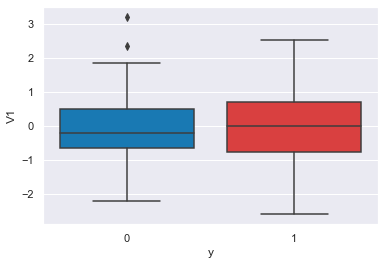

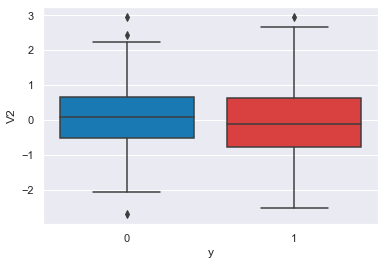

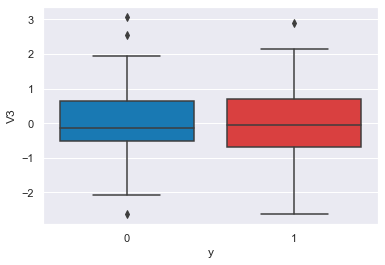

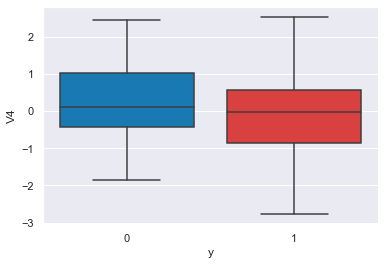

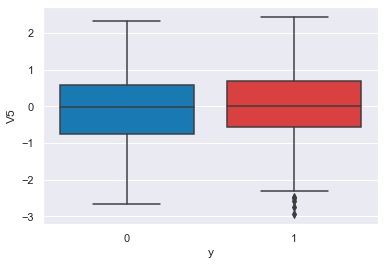

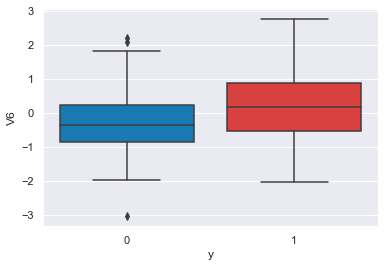

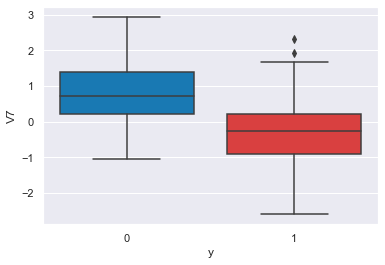

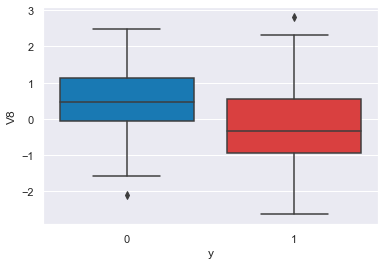

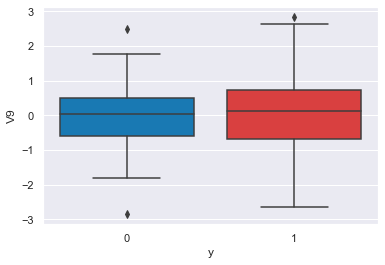

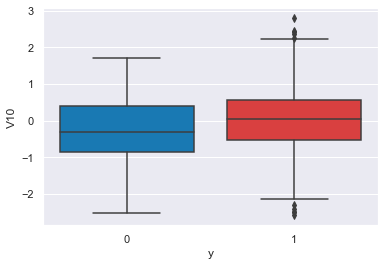

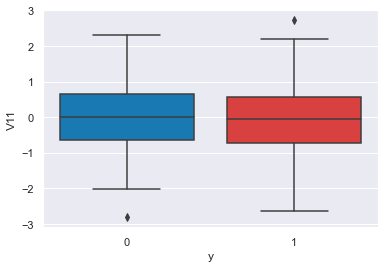

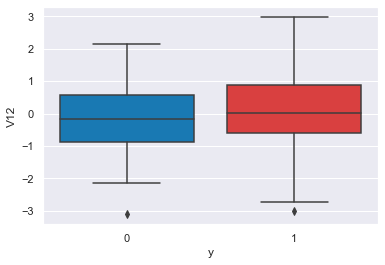

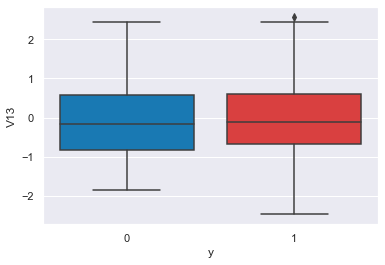

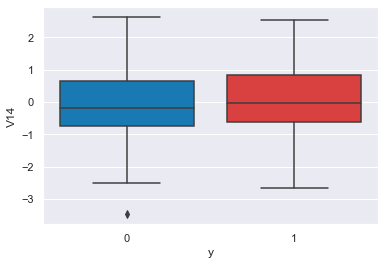

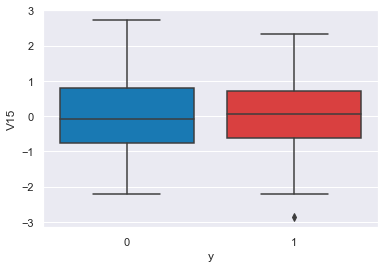

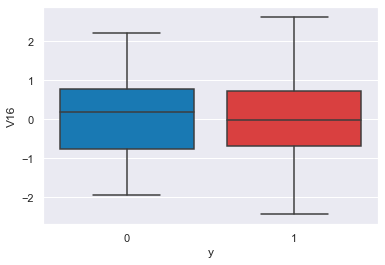

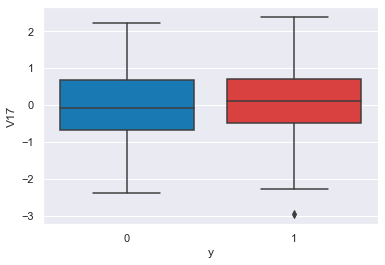

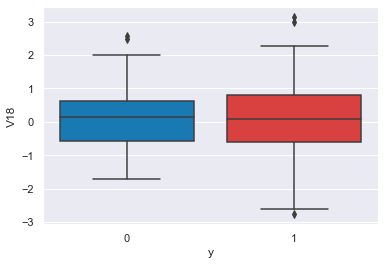

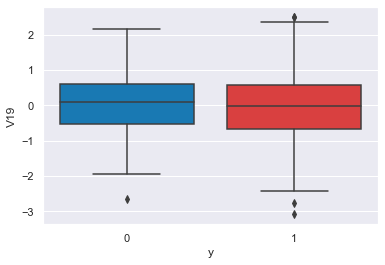

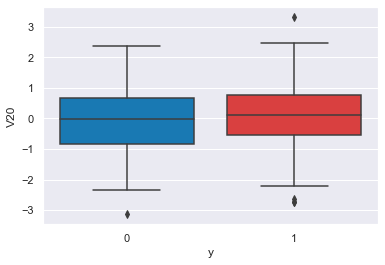

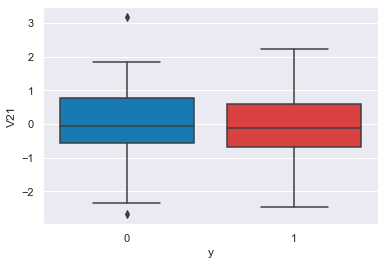

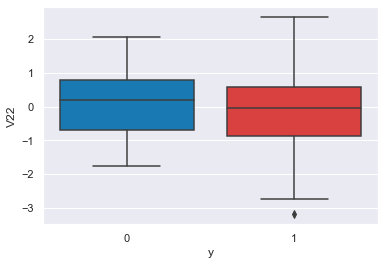

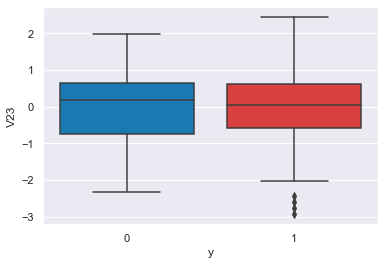

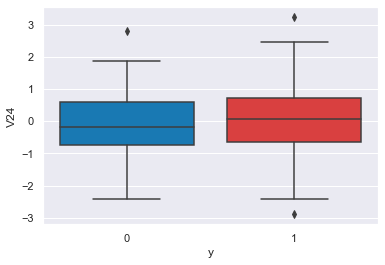

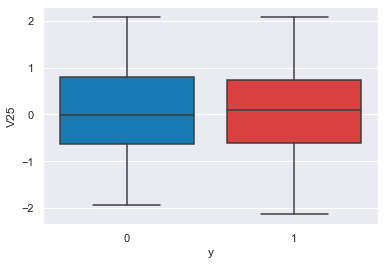

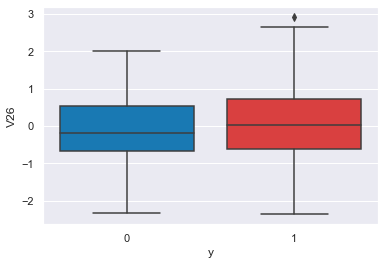

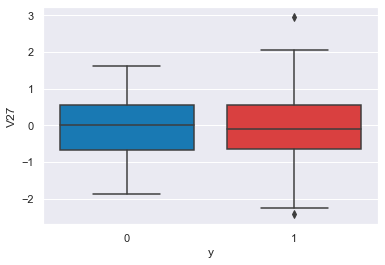

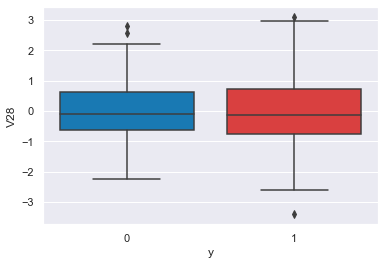

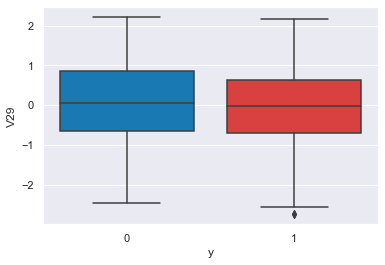

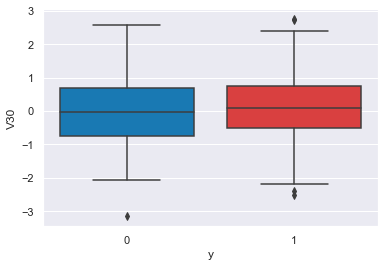

In [119]:
# boxplot: covariate vs response
for i in range(1, 31):
    sns.boxplot(x = "y", y = "V"+str(i), data=train, palette=[(0, 0.50, 0.80),(0.95, 0.15, 0.15)])
    plt.show()

By examine the boxplots, we found the following variables might be of importance
$V_2, V_4, V_6, V_7, V_8, V_{10}$

##  Identical distribution of the training and testing data

Conduct Kolmogorov-Smirnov test between training and test set to test they have identical distribution.

In [120]:
##  Kolmogorov-Smirnov test between train and test
pvalues_KS = []
for i in range(30):
    pvalues_KS.append(stats.ks_2samp(train.iloc[:,i], test.iloc[:,i])[1])
print(pvalues_KS)

print("\nThe smallest p-value:")
print(min(pvalues_KS))

pvalues_KS = np.array(pvalues_KS)
k = 4
result = np.argpartition(pvalues_KS, k)
print(f"\n{k} smallest p-values:")
print(pvalues_KS[result[:k]])

[0.338163253275678, 0.05401863039081145, 0.8212036235632637, 0.29438543509316883, 0.9331465932886858, 0.3860788403506935, 0.1595966581222399, 0.5519872111664752, 0.4652958754312211, 0.14691437867433788, 0.135055003651242, 0.4115432028915931, 0.29438543509316883, 0.9730293965208306, 0.338163253275678, 0.3860788403506935, 0.09514476355265278, 0.12398372491604603, 0.9331465932886858, 0.27405906781258516, 0.05401863039081145, 0.20291443022882139, 0.9331465932886858, 0.7048747432345441, 0.5519872111664752, 0.8212036235632637, 0.10406407399422646, 0.11366524662811528, 0.9149913972436403, 0.8945293411715565]

The smallest p-value:
0.05401863039081145

4 smallest p-values:
[0.05401863 0.05401863 0.09514476 0.10406407]


All numeric features have identical distribution in training and test set.

# Order-2 Analysis

In [109]:
train2 = pd.read_csv('data/train2.csv')
test2 = pd.read_csv('data/test2.csv')
train2.rename(columns = {'Unnamed: 0': 'index'}, inplace=True)
train2.set_index('index', inplace=True)
test2.rename(columns = {'Unnamed: 0': 'index'}, inplace=True)
test2.set_index('index', inplace=True)

In [110]:
train2

,y,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V1.V2,V1.V3,V1.V4,V1.V5,V1.V6,V1.V7,V1.V8,V1.V9,V1.V10,V1.V11,V1.V12,V1.V13,V1.V14,V1.V15,V1.V16,V1.V17,V1.V18,V1.V19,V1.V20,V1.V21,V1.V22,V1.V23,V1.V24,V1.V25,V1.V26,V1.V27,V1.V28,V1.V29,V1.V30,V2.V3,V2.V4,V2.V5,V2.V6,V2.V7,V2.V8,V2.V9,V2.V10,V2.V11,V2.V12,V2.V13,V2.V14,V2.V15,V2.V16,V2.V17,V2.V18,V2.V19,V2.V20,V2.V21,V2.V22,V2.V23,V2.V24,V2.V25,V2.V26,V2.V27,V2.V28,V2.V29,V2.V30,V3.V4,V3.V5,V3.V6,V3.V7,V3.V8,V3.V9,V3.V10,V3.V11,V3.V12,V3.V13,V3.V14,V3.V15,V3.V16,V3.V17,V3.V18,V3.V19,V3.V20,V3.V21,V3.V22,V3.V23,V3.V24,V3.V25,V3.V26,V3.V27,V3.V28,V3.V29,V3.V30,V4.V5,V4.V6,V4.V7,V4.V8,V4.V9,V4.V10,V4.V11,V4.V12,V4.V13,V4.V14,V4.V15,V4.V16,V4.V17,V4.V18,V4.V19,V4.V20,V4.V21,V4.V22,V4.V23,V4.V24,V4.V25,V4.V26,V4.V27,V4.V28,V4.V29,V4.V30,V5.V6,V5.V7,V5.V8,V5.V9,V5.V10,V5.V11,V5.V12,V5.V13,V5.V14,V5.V15,V5.V16,V5.V17,V5.V18,V5.V19,V5.V20,V5.V21,V5.V22,V5.V23,V5.V24,V5.V25,V5.V26,V5.V27,V5.V28,V5.V29,V5.V30,V6.V7,V6.V8,V6.V9,V6.V10,V6.V11,V6.V12,V6.V13,V6.V14,V6.V15,V6.V16,V6.V17,V6.V18,V6.V19,V6.V20,V6.V21,V6.V22,V6.V23,V6.V24,V6.V25,V6.V26,V6.V27,V6.V28,V6.V29,V6.V30,V7.V8,V7.V9,V7.V10,V7.V11,V7.V12,V7.V13,V7.V14,V7.V15,V7.V16,V7.V17,V7.V18,V7.V19,V7.V20,V7.V21,V7.V22,V7.V23,V7.V24,V7.V25,V7.V26,V7.V27,V7.V28,V7.V29,V7.V30,V8.V9,V8.V10,V8.V11,V8.V12,V8.V13,V8.V14,V8.V15,V8.V16,V8.V17,V8.V18,V8.V19,V8.V20,V8.V21,V8.V22,V8.V23,V8.V24,V8.V25,V8.V26,V8.V27,V8.V28,V8.V29,V8.V30,V9.V10,V9.V11,V9.V12,V9.V13,V9.V14,V9.V15,V9.V16,V9.V17,V9.V18,V9.V19,V9.V20,V9.V21,V9.V22,V9.V23,V9.V24,V9.V25,V9.V26,V9.V27,V9.V28,V9.V29,V9.V30,V10.V11,V10.V12,V10.V13,V10.V14,V10.V15,V10.V16,V10.V17,V10.V18,V10.V19,V10.V20,V10.V21,V10.V22,V10.V23,V10.V24,V10.V25,V10.V26,V10.V27,V10.V28,V10.V29,V10.V30,V11.V12,V11.V13,V11.V14,V11.V15,V11.V16,V11.V17,V11.V18,V11.V19,V11.V20,V11.V21,V11.V22,V11.V23,V11.V24,V11.V25,V11.V26,V11.V27,V11.V28,V11.V29,V11.V30,V12.V13,V12.V14,V12.V15,V12.V16,V12.V17,V12.V18,V12.V19,V12.V20,V12.V21,V12.V22,V12.V23,V12.V24,V12.V25,V12.V26,V12.V27,V12.V28,V12.V29,V12.V30,V13.V14,V13.V15,V13.V16,V13.V17,V13.V18,V13.V19,V13.V20,V13.V21,V13.V22,V13.V23,V13.V24,V13.V25,V13.V26,V13.V27,V13.V28,V13.V29,V13.V30,V14.V15,V14.V16,V14.V17,V14.V18,V14.V19,V14.V20,V14.V21,V14.V22,V14.V23,V14.V24,V14.V25,V14.V26,V14.V27,V14.V28,V14.V29,V14.V30,V15.V16,V15.V17,V15.V18,V15.V19,V15.V20,V15.V21,V15.V22,V15.V23,V15.V24,V15.V25,V15.V26,V15.V27,V15.V28,V15.V29,V15.V30,V16.V17,V16.V18,V16.V19,V16.V20,V16.V21,V16.V22,V16.V23,V16.V24,V16.V25,V16.V26,V16.V27,V16.V28,V16.V29,V16.V30,V17.V18,V17.V19,V17.V20,V17.V21,V17.V22,V17.V23,V17.V24,V17.V25,V17.V26,V17.V27,V17.V28,V17.V29,V17.V30,V18.V19,V18.V20,V18.V21,V18.V22,V18.V23,V18.V24,V18.V25,V18.V26,V18.V27,V18.V28,V18.V29,V18.V30,V19.V20,V19.V21,V19.V22,V19.V23,V19.V24,V19.V25,V19.V26,V19.V27,V19.V28,V19.V29,V19.V30,V20.V21,V20.V22,V20.V23,V20.V24,V20.V25,V20.V26,V20.V27,V20.V28,V20.V29,V20.V30,V21.V22,V21.V23,V21.V24,V21.V25,V21.V26,V21.V27,V21.V28,V21.V29,V21.V30,V22.V23,V22.V24,V22.V25,V22.V26,V22.V27,V22.V28,V22.V29,V22.V30,V23.V24,V23.V25,V23.V26,V23.V27,V23.V28,V23.V29,V23.V30,V24.V25,V24.V26,V24.V27,V24.V28,V24.V29,V24.V30,V25.V26,V25.V27,V25.V28,V25.V29,V25.V30,V26.V27,V26.V28,V26.V29,V26.V30,V27.V28,V27.V29,V27.V30,V28.V29,V28.V30,V29.V30,V1.2,V2.2,V3.2,V4.2,V5.2,V6.2,V7.2,V8.2,V9.2,V10.2,V11.2,V12.2,V13.2,V14.2,V15.2,V16.2,V17.2,V18.2,V19.2,V20.2,V21.2,V22.2,V23.2,V24.2,V25.2,V26.2,V27.2,V28.2,V29.2,V30.2
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,